In [ ]:
import numpy as np
import pandas as pd
import os
import glob
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
import random

train_dataset_path = Path("/content/drive/MyDrive/Colab Notebooks/Capstone 1/Part 1/Images/Train")
test_dataset_path = Path("/content/drive/MyDrive/Colab Notebooks/Capstone 1/Part 1/Images/Test")
labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone 1/Part 1/labels2.csv")

EDA for Labels

In [ ]:
# Display the first few rows and general information to analyze the data
labels_info = labels.info()
labels_head = labels.head()

labels_info, labels_head

In [ ]:
# Check for invalid bounding boxes where x2 <= x1 or y2 <= y1
invalid_boxes = labels[(labels['x2'] <= labels['x1']) | (labels['y2'] <= labels['y1'])]

# Inspect unique vehicle types to ensure they match the predefined class mapping
unique_vehicle_types = labels['vehicle_type'].unique()

# Count the number of entries per image_id
entries_per_image = labels['image_id'].value_counts()

# Check for duplicate rows in the dataset
duplicate_rows = labels[labels.duplicated()]

# Output results
invalid_boxes_count = invalid_boxes.shape[0]
unique_vehicle_types_list = list(unique_vehicle_types)
duplicate_rows_count = duplicate_rows.shape[0]
entries_per_image_summary = entries_per_image.describe()

invalid_boxes_count, unique_vehicle_types_list, duplicate_rows_count, entries_per_image_summary

In [ ]:
# class distribution
class_distribution = labels['vehicle_type'].value_counts()

# Plot class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution of Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

VIZ for IMAGES

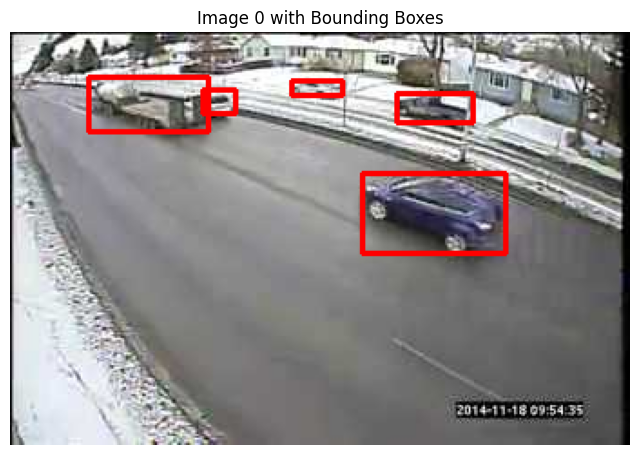

In [57]:
def visualize_bounding_boxes(image_path, labels_df, image_id):
    """
    Visualizes an image with all its bounding boxes.

    Args:
        image_path: Path to the image file.
        labels_df: Pandas DataFrame containing the labels.
        image_id: The ID of the image to visualize.
    """
    # Check if the image file exists
    if not os.path.exists(image_path):
        print(f"Error: Image file not found at {image_path}")
        return

    image = cv2.imread(image_path)

    # Check if image was loaded correctly
    if image is None:
        print(f"Error: Failed to load image from {image_path}")
        return

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Filter labels for the specific image_id
    image_bboxes = labels_df[labels_df['image_id'] == image_id]

    # Iterate through bounding boxes for the image
    for index, row in image_bboxes.iterrows():
        x1, y1, x2, y2 = map(int, [row['x1'], row['y1'], row['x2'], row['y2']])
        image = cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Image {image_id} with Bounding Boxes")
    plt.show()

# Example usage
example_image_id = labels.iloc[0]['image_id']  # Get image_id from the first row
image_id_formatted = f"{example_image_id:08}"
image_path = train_dataset_path / f"{image_id_formatted}.jpg"

# Call the updated function
visualize_bounding_boxes(str(image_path), labels, example_image_id)

In [ ]:
from sklearn.model_selection import train_test_split

# Separate training and testing labels based on image ID
train_labels = labels[labels.iloc[:, 0] <= 4000]
test_labels = labels[labels.iloc[:, 0] > 4000]
train_labels, val_labels = train_test_split(train_labels, test_size=0.3, random_state=42)